# nextBuy

#### Problem Statement
An e-commerce company wants to recommend products to its users. The company has collected only transaction data in the past. The training dataset has only 3 columns - user_id, Product bought and Order value of the product. Using this dataset, predict for all the users in the training dataset, the top 3 categories that the user might buy from.

For each user, predict the top 3 probable product categories that they may purchase from, in the future.

## Data Gathering

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('data/Training Data.csv')
data_df

,user_id,aov,category
0,37327,29128.0,Phones
1,37327,354.0,Fashion
2,37327,460.0,Home Decor
3,37327,761.0,Fashion
4,41260,16658.0,Phones
...,...,...,...
257402,29237,689.0,Fashion
257403,15197,2195.0,Groceries
257404,2114,559.0,Back to School
257405,35741,18451.0,Phones


In [3]:
dataf_df = pd.read_csv('data/Training Data Target.csv')
dataf_df

,user_id,aov,category
0,13153,-9999,Phones
1,42853,-9999,Phones
2,30550,-9999,Phones
3,9797,-9999,Phones
4,8171,-9999,Phones
...,...,...,...
13240,49383,-9999,Fashion
13241,49590,-9999,Home Decor
13242,49799,-9999,Fitness
13243,49900,-9999,Fitness


In [4]:
test_df = pd.read_csv('data/Test Data.csv', index_col=0)
test_df

,user_id,aov,category
0,43323,19115.0,Phones
1,43323,29309.0,Phones
2,43323,15293.0,Phones
3,43323,23548.0,Phones
4,43323,751.0,Fashion
...,...,...,...
86137,12403,1841.0,Groceries
86138,31036,424.0,Back to School
86139,12652,617.0,Fashion
86140,35726,634.0,Kitchen cleaning Supplies


In [11]:
set(data_df['category']), len(set(data_df['category']))

({'Back to School',
  'Beauty Products',
  'Board Games',
  'Books',
  'Consumer Durables',
  'Ereaders',
  'Fashion',
  'Fitness',
  'Gaming',
  'Groceries',
  'Home Decor',
  'Kitchen cleaning Supplies',
  'Laptops',
  'Painiting Supplies',
  'Pet Supplies',
  'Phones',
  'TVs',
  'Toys'},
 18)

In [20]:
data_df['category'].unique()

array(['Phones', 'Fashion', 'Home Decor', 'Consumer Durables',
       'Back to School', 'Toys', 'Books', 'Groceries', 'Fitness',
       'Board Games', 'Painiting Supplies', 'Gaming', 'TVs', 'Laptops',
       'Beauty Products', 'Pet Supplies', 'Ereaders',
       'Kitchen cleaning Supplies'], dtype=object)

In [22]:
len(data_df['user_id'].unique())

29972

In [32]:
frequency_df = data_df[data_df['category'] == 'Phones']
phones_df

,user_id,aov,category
0,37327,29128.0,Phones
4,41260,16658.0,Phones
7,19360,10214.0,Phones
8,19360,16761.0,Phones
9,19360,6382.0,Phones
...,...,...,...
257371,9808,7021.0,Phones
257391,33050,5964.0,Phones
257400,28087,16828.0,Phones
257405,35741,18451.0,Phones


In [50]:
phones_df['aov'].median()

15896.0

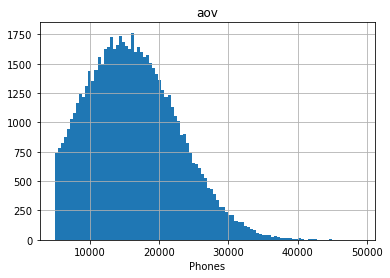

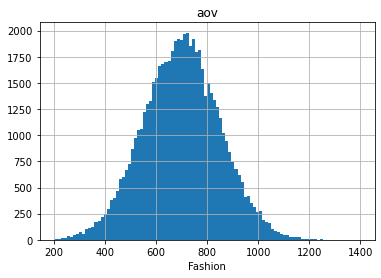

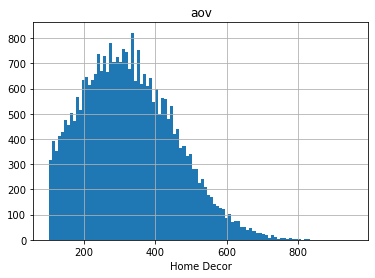

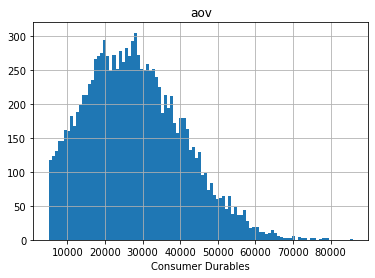

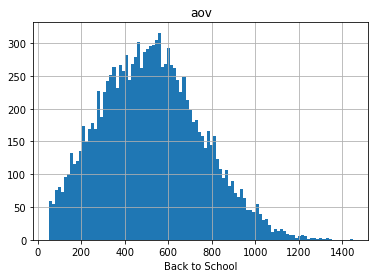

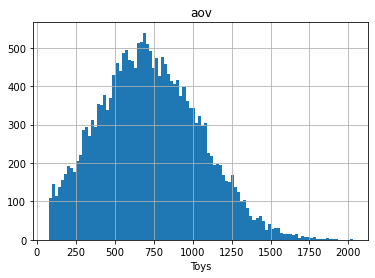

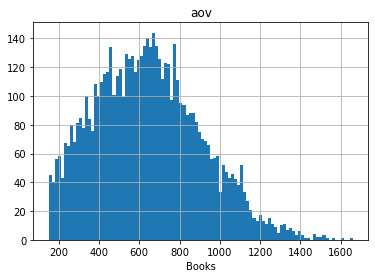

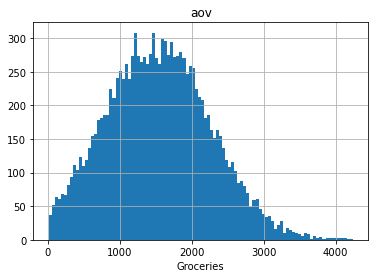

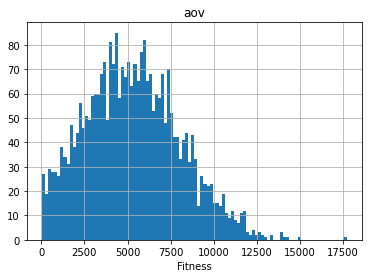

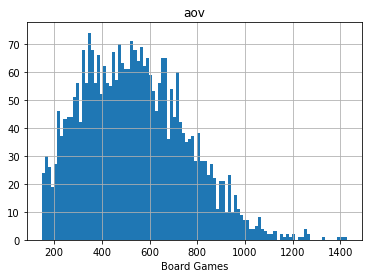

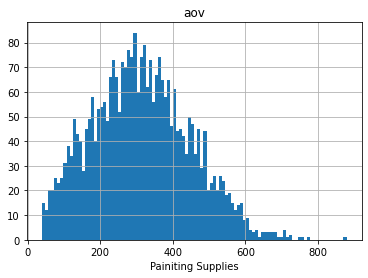

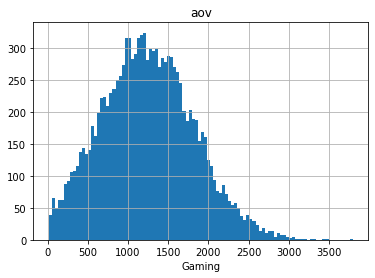

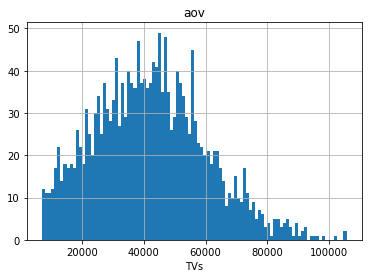

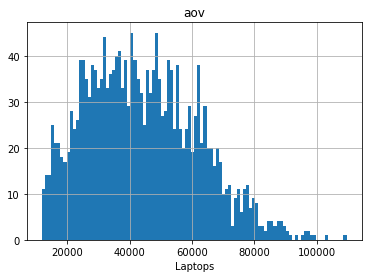

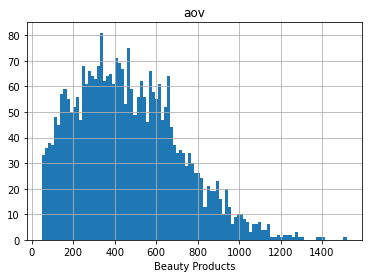

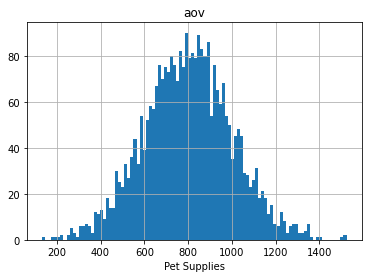

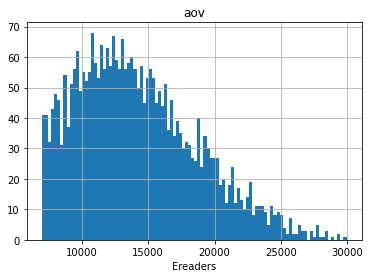

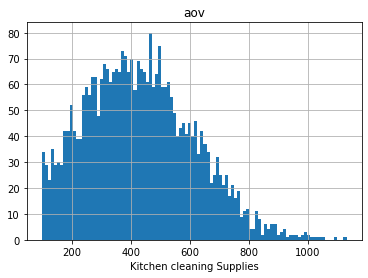

In [63]:
for category in data_df['category'].unique():
    plt = data_df[data_df['category'] == category].hist(column='aov', bins=100)
    plt[0][0].set_xlabel(category)

In [8]:
len(data_df['user_id'].unique())

29972

In [126]:
import numpy as np
np.random.seed(seed=1)
frequency_df = data_df.pivot_table(index='user_id', 
               columns='category',
               aggfunc='size',
               fill_value=0).iloc[np.random.randint(data_df['user_id'].unique().shape[0], size=11,)]
frequency_df

category,Back to School,Beauty Products,Board Games,Books,Consumer Durables,Ereaders,Fashion,Fitness,Gaming,Groceries,Home Decor,Kitchen cleaning Supplies,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs,Toys
user_id,,,,,,,,,,,,,,,,,,
49617,0,0,1,0,0,0,2,0,1,0,0,1,0,0,0,0,0,1
377,1,0,0,0,0,0,1,0,1,1,2,0,0,0,0,1,0,2
20325,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,3,0,1
8601,0,0,0,0,0,0,2,0,1,1,1,0,0,0,0,1,0,0
28925,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0
18296,1,0,0,0,1,1,1,0,1,0,1,0,0,0,0,2,0,3
13069,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0
32161,0,1,0,1,0,0,4,0,0,0,0,0,0,0,0,2,0,0
35704,0,0,0,0,1,0,3,0,1,1,2,0,0,0,0,5,1,2


In [263]:
from scipy.spatial import distance

candidate_user = frequency_df.iloc[0].tolist()
candidate_user_purchases = list(map(bool, candidate_user))
candidate_user = [item for item in candidate_user if item]
print(f"Candidate User: {candidate_user}\n")
print(f"Candidate User Purchase: {candidate_user_purchases}\n")

users_df = frequency_df.iloc[:, candidate_user_purchases]
similarity_df = pd.DataFrame(None)
for idx, row in users_df.iterrows():
    current_user = row.tolist()
#     print(current_user, candidate_user)

    eucl_dist = distance.euclidean(current_user, candidate_user)
    cosine_dist = distance.cosine(current_user, candidate_user)
    cosine_sim = 1 - cosine_dist

    similarity_df = similarity_df.append([{'user_id':idx, 'eucl_dist':eucl_dist, 'cosine_dist':cosine_dist, 'cosine_sim':cosine_sim}])
similarity_df = similarity_df.set_index('user_id')
similarity_df = similarity_df.fillna(0)
similarity_df

Candidate User: [1, 2, 1, 1, 1]

Candidate User Purchase: [False, False, True, False, False, False, True, False, True, False, False, True, False, False, False, False, False, True]



/opt/homebrew/Caskroom/miniforge/base/envs/.venv/lib/python3.9/site-packages/scipy/spatial/distance.py:728: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


,eucl_dist,cosine_dist,cosine_sim
user_id,,,
49617,0.000000,0.000000,1.000000
377,2.000000,0.278312,0.721688
20325,1.732051,0.183503,0.816497
8601,1.732051,0.209431,0.790569
28925,2.828427,0.292893,0.707107
18296,2.645751,0.360398,0.639602
13069,2.000000,0.217376,0.782624
32161,2.828427,0.292893,0.707107
35704,2.000000,0.149580,0.850420


In [264]:
similarity_matrix = similarity_df['cosine_sim'].tolist()
similarity_matrix

[1.0,
 0.7216878364870322,
 0.8164965809277261,
 0.7905694150420948,
 0.7071067811865475,
 0.6396021490668312,
 0.7826237921249264,
 0.7071067811865475,
 0.8504200642707613,
 0.7071067811865475,
 0.0]

In [265]:
users_df

category,Board Games,Fashion,Gaming,Kitchen cleaning Supplies,Toys
user_id,,,,,
49617,1,2,1,1,1
377,0,1,1,0,2
20325,0,1,1,0,1
8601,0,2,1,0,0
28925,0,4,0,0,0
18296,0,1,1,0,3
13069,0,3,1,0,0
32161,0,4,0,0,0
35704,0,3,1,0,2


In [266]:
users_subset_df = frequency_df.loc[:, list(map(lambda x: not x, candidate_user_purchases))]
users_subset_df

category,Back to School,Beauty Products,Books,Consumer Durables,Ereaders,Fitness,Groceries,Home Decor,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs
user_id,,,,,,,,,,,,,
49617,0,0,0,0,0,0,0,0,0,0,0,0,0
377,1,0,0,0,0,0,1,2,0,0,0,1,0
20325,1,0,0,1,0,0,0,0,0,0,1,3,0
8601,0,0,0,0,0,0,1,1,0,0,0,1,0
28925,0,0,0,0,0,0,0,0,0,0,0,2,0
18296,1,0,0,1,1,0,0,1,0,0,0,2,0
13069,0,0,0,0,0,0,0,1,0,0,0,0,0
32161,0,1,1,0,0,0,0,0,0,0,0,2,0
35704,0,0,0,1,0,0,1,2,0,0,0,5,1


In [267]:
weighted_users_df = users_subset_df.loc[:,list(users_subset_df.columns)].transpose() * similarity_matrix
weighted_users_df = weighted_users_df.transpose()
weighted_users_df

category,Back to School,Beauty Products,Books,Consumer Durables,Ereaders,Fitness,Groceries,Home Decor,Laptops,Painiting Supplies,Pet Supplies,Phones,TVs
user_id,,,,,,,,,,,,,
49617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000
377,0.721688,0.000000,0.000000,0.000000,0.000000,0.000000,0.721688,1.443376,0.0,0.0,0.000000,0.721688,0.00000
20325,0.816497,0.000000,0.000000,0.816497,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.816497,2.449490,0.00000
8601,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790569,0.790569,0.0,0.0,0.000000,0.790569,0.00000
28925,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.414214,0.00000
18296,0.639602,0.000000,0.000000,0.639602,0.639602,0.000000,0.000000,0.639602,0.0,0.0,0.000000,1.279204,0.00000
13069,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.782624,0.0,0.0,0.000000,0.000000,0.00000
32161,0.000000,0.707107,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.414214,0.00000
35704,0.000000,0.000000,0.000000,0.850420,0.000000,0.000000,0.850420,1.700840,0.0,0.0,0.000000,4.252100,0.85042


In [278]:
weights = dict()
for category in weighted_users_df.columns:
    print(category)
    weighted_category = weighted_users_df[category]
    print(weighted_category)
    weighted_category_sum = sum(weighted_category)
    print(f"Sum of {category}\t: {weighted_category_sum}")
    print(similarity_matrix)
    similarity_matrix_sum = sum([sim for cat, sim in zip(weighted_category, similarity_matrix) if cat])
    print(similarity_matrix_sum)
    if weighted_category_sum:
        weights[category] = weighted_category_sum / similarity_matrix_sum
    else:
        weights[category] = weighted_category_sum
print(weights)

Back to School
user_id
49617    0.000000
377      0.721688
20325    0.816497
8601     0.000000
28925    0.000000
18296    0.639602
13069    0.000000
32161    0.000000
35704    0.000000
230      0.707107
34349    0.000000
Name: Back to School, dtype: float64
Sum of Back to School	: 2.884893347668137
[1.0, 0.7216878364870322, 0.8164965809277261, 0.7905694150420948, 0.7071067811865475, 0.6396021490668312, 0.7826237921249264, 0.7071067811865475, 0.8504200642707613, 0.7071067811865475, 0.0]
2.884893347668137
Beauty Products
user_id
49617    0.000000
377      0.000000
20325    0.000000
8601     0.000000
28925    0.000000
18296    0.000000
13069    0.000000
32161    0.707107
35704    0.000000
230      0.707107
34349    0.000000
Name: Beauty Products, dtype: float64
Sum of Beauty Products	: 1.414213562373095
[1.0, 0.7216878364870322, 0.8164965809277261, 0.7905694150420948, 0.7071067811865475, 0.6396021490668312, 0.7826237921249264, 0.7071067811865475, 0.8504200642707613, 0.7071067811865475, 0.

In [276]:
0.7216878364870322 + 0.8164965809277261 + 0.6396021490668312 + 0.7071067811865475

2.884893347668137